In [2]:
from spextra import Spextrum
from setplot import set_plot_style

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import os 

set_plot_style()

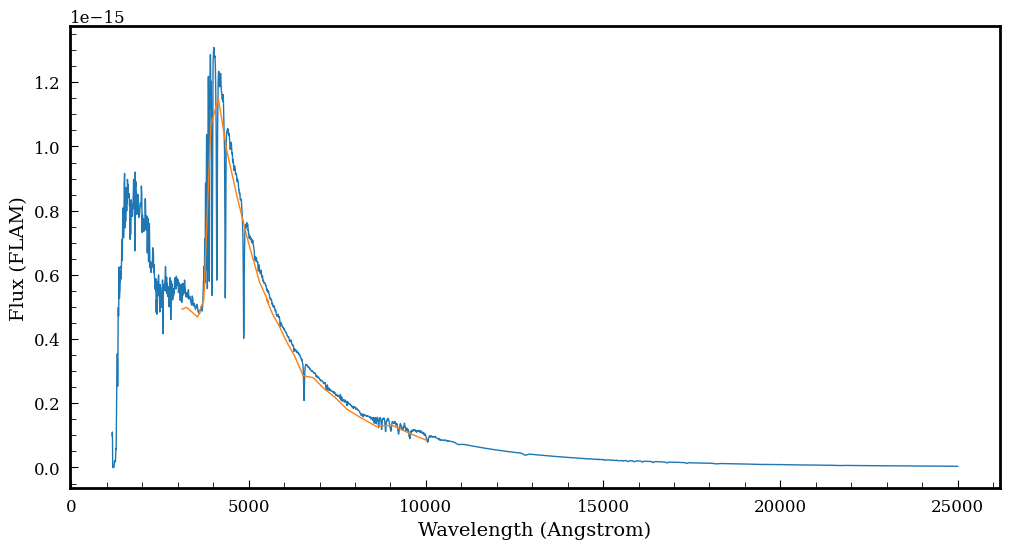

In [4]:
#pickels a0v z=0 17AB@B
wave = 10*np.array([1001.6, 957.3, 904.3, 860.2, 815.8, 777.6, 742.6, 711.2, 
                 682.1, 653.8, 629.5, 607.7, 585.9, 568, 550.5, 556, 531, 496.8, 466.4, 438.8, 414.5, 393.2, 373.5, 
                     356.1, 339.8, 325, 312.2])

flux = np.array([8.48838e-17, 1.04747e-16, 1.3153e-16, 1.27883e-16, 1.55383e-16, 
                 1.81161e-16, 2.19154e-16, 2.47083e-16, 2.79846e-16, 2.85812e-16, 
                 3.47628e-16, 3.90105e-16, 4.41517e-16, 4.76655e-16, 5.22636e-16, 5.15689e-16, 5.76415e-16, 7.11894e-16, 8.47624e-16, 
                     9.85233e-16, 1.14934e-15, 1.06593e-15, 5.22732e-16, 
                     4.68603e-16, 4.84328e-16, 4.98761e-16, 4.93037e-16])

#to read a generic file with two columns
'''
file_path = "data.txt"  
wave, flux = np.loadtxt(file_path, unpack=True)
'''

sp = Spextrum('pickles/a0v', z=0)
sp2 = sp.scale_to_magnitude(amplitude=17 * u.ABmag, filter_curve="B")
sp2.plot(flux_unit="FLAM")
plt.plot(wave,flux)
plt.show()

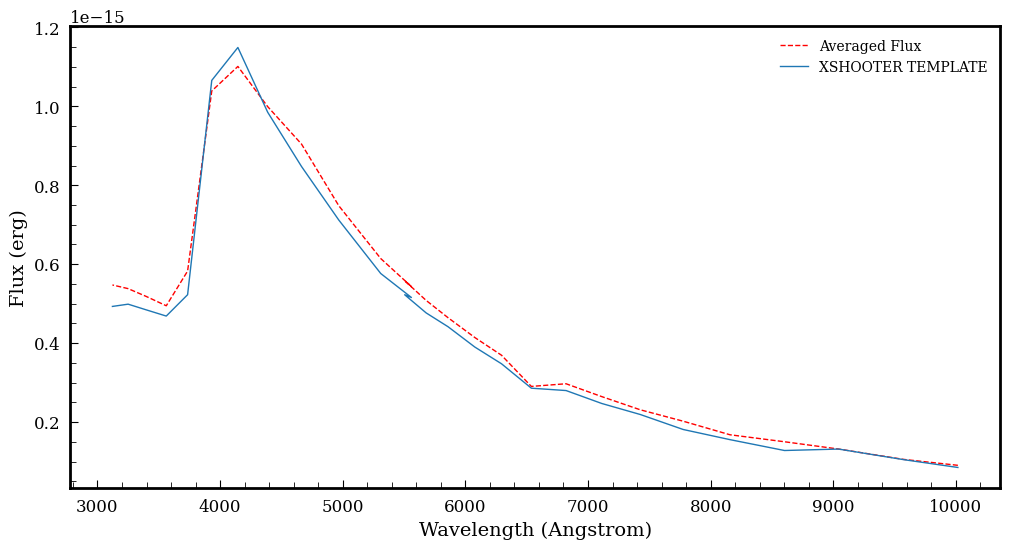

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from astropy import units as u

X = sp2.to_spectrum1d(flux_unit='FLAM')

sp2_wave = X.wavelength.value
sp2_flux = X.flux.value

# Interpolate sp2 flux to the wavelengths in `wave`
interp_function = interp1d(sp2_wave, sp2_flux, kind='linear', bounds_error=False, fill_value=0)
interpolated_flux = interp_function(wave)

# Now perform a moving average (window-based) on the interpolated flux around each wavelength in `wave`
window_size = 40  # +/- window size in Angstroms for averaging

# Initialize an empty array for the averaged flux
averaged_flux = []

# Compute the average within the window for each wavelength in `wave`
for w in wave:
    # Create a window around the current wavelength (±window_size)
    window_mask = (sp2_wave >= w - window_size) & (sp2_wave <= w + window_size)
    
    # Average the flux values within the window
    avg_flux = np.mean(sp2_flux[window_mask])
    averaged_flux.append(avg_flux)

# Convert the averaged flux to a numpy array
averaged_flux = np.array(averaged_flux)

# Plotting the results
#plt.plot(sp2_wave, sp2_flux, label='Interpolated Flux from sp2', color='blue')
plt.plot(wave, averaged_flux, label='Averaged Flux', color='red', linestyle='--')
plt.plot(wave,flux, label = 'XSHOOTER TEMPLATE')
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux (erg)")
plt.legend()
plt.show()

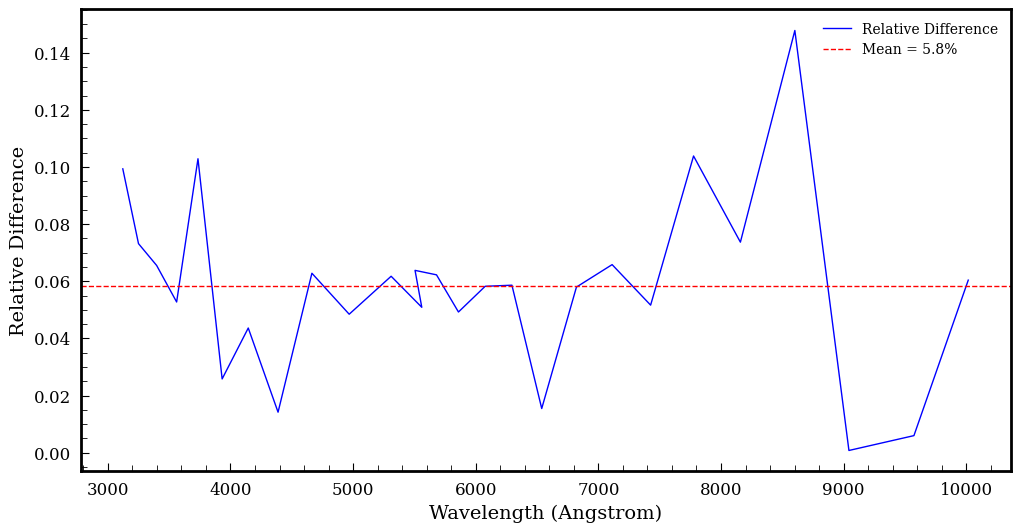

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous code is run and averaged_flux, flux, and wave are available

# Calculate the relative difference between the fluxes
relative_diff = np.abs(averaged_flux - flux) / averaged_flux

# Calculate the mean of the relative difference
mean_relative_diff = np.mean(relative_diff)

# Plot the relative difference
plt.plot(wave, relative_diff, label='Relative Difference', color='blue')

# Plot the mean of the relative difference as a horizontal line
plt.axhline(mean_relative_diff, color='red', linestyle='--', label=f'Mean = {mean_relative_diff*100:.2}%')

# Adding labels and legend
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Relative Difference")
plt.legend()

# Display the plot
plt.show()


In [ ]:
- bb
- kurutz/b1v
- pickles/a0v
- pl
- em
- startburst galaxy

In [6]:
from spextra import spextra_database
spextra_database["filter_systems"]

{'elt/micado': 'MICADO filters',
 'elt/metis': 'METIS filters',
 'etc': 'ESO ETC standard filters'}

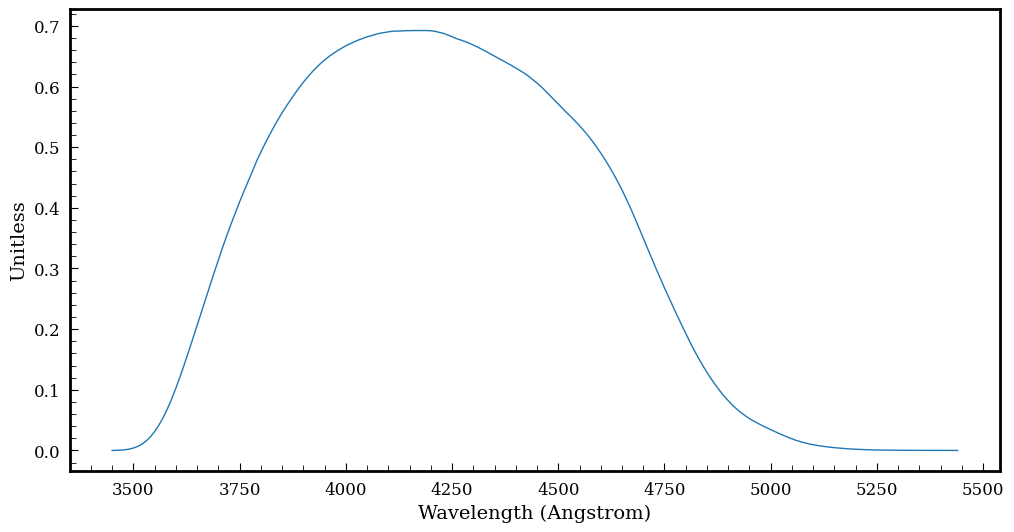

In [8]:
from spextra import Passband
filt = Passband("etc/B")
filt.plot()


In [12]:
help(Spextrum)

Help on class Spextrum in module spextra.spextra:

class Spextrum(synphot.spectrum.SourceSpectrum, spextra.containers.SpectrumContainer)
 |  Spextrum(template_name=None, modelclass=None, **kwargs)
 |  
 |  Class to handle spectra.
 |  
 |  This class download, load, stores and manipulates the spectra.
 |  
 |  This class can be initialized with a remote file which will be downloaded
 |  from the database or with a ``synphot.BaseSpectrum`` or ``SourceSpectrum``.
 |  
 |  
 |  Parameters
 |  ----------
 |  template_name : Name of the template to download with format
 |  library/template e.g. "kc96/s0"
 |  modelclass : SourceSpectrum or BaseSpectrum
 |  
 |  Method resolution order:
 |      Spextrum
 |      synphot.spectrum.SourceSpectrum
 |      synphot.spectrum.BaseSourceSpectrum
 |      synphot.spectrum.BaseSpectrum
 |      spextra.containers.SpectrumContainer
 |      spextra.containers.DBFile
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      